In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, validation_curve, learning_curve
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_house_set = pd.read_csv('../Brief/house_data_for_model.csv')

In [3]:
df_house_set

,Unnamed: 0.1,Unnamed: 0,date,prix,chambres,salles_de_bain,m2_habitable,m2_Lot,étages,vue_sur_l-eau,...,condition,état,m2_above,m2_cave,yr_renovated,zipcode,lat,long,m2_habitable15,m2_lot15
0,0,0,20141013T000000,221900.0,3,1.00,393.33,1883.33,1.0,0,...,3,7,393.33,0.00,1955,98178,47.51,-122.26,446.67,1883.33
1,1,1,20141209T000000,538000.0,3,2.25,856.67,2414.00,2.0,0,...,3,7,723.33,133.33,1991,98125,47.72,-122.32,563.33,2546.33
2,2,2,20150225T000000,180000.0,2,1.00,256.67,3333.33,1.0,0,...,3,6,256.67,0.00,1933,98028,47.74,-122.23,906.67,2687.33
3,3,3,20141209T000000,604000.0,4,3.00,653.33,1666.67,1.0,0,...,5,7,350.00,303.33,1965,98136,47.52,-122.39,453.33,1666.67
4,4,4,20150218T000000,510000.0,3,2.00,560.00,2693.33,1.0,0,...,3,8,560.00,0.00,1987,98074,47.62,-122.04,600.00,2501.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,21608,20140521T000000,360000.0,3,2.50,510.00,377.00,3.0,0,...,3,8,510.00,0.00,2009,98103,47.70,-122.35,510.00,503.00
21609,21609,21609,20150223T000000,400000.0,4,2.50,770.00,1937.67,2.0,0,...,3,8,770.00,0.00,2014,98146,47.51,-122.36,610.00,2400.00
21610,21610,21610,20140623T000000,402101.0,2,0.75,340.00,450.00,2.0,0,...,3,7,340.00,0.00,2009,98144,47.59,-122.30,340.00,669.00
21611,21611,21611,20150116T000000,400000.0,3,2.50,533.33,796.00,2.0,0,...,3,8,533.33,0.00,2004,98027,47.53,-122.07,470.00,429.00


In [3]:
df_house_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    21613 non-null  int64  
 1   Unnamed: 0      21613 non-null  int64  
 2   date            21613 non-null  object 
 3   prix            21613 non-null  float64
 4   chambres        21613 non-null  int64  
 5   salles_de_bain  21613 non-null  float64
 6   m2_habitable    21613 non-null  float64
 7   m2_Lot          21613 non-null  float64
 8   étages          21613 non-null  float64
 9   vue_sur_l-eau   21613 non-null  int64  
 10  vue             21613 non-null  int64  
 11  condition       21613 non-null  int64  
 12  état            21613 non-null  int64  
 13  m2_above        21613 non-null  float64
 14  m2_cave         21613 non-null  float64
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

<Axes: title={'center': 'prix en fonction des m2 habitable'}, xlabel='m2_habitable', ylabel='prix'>

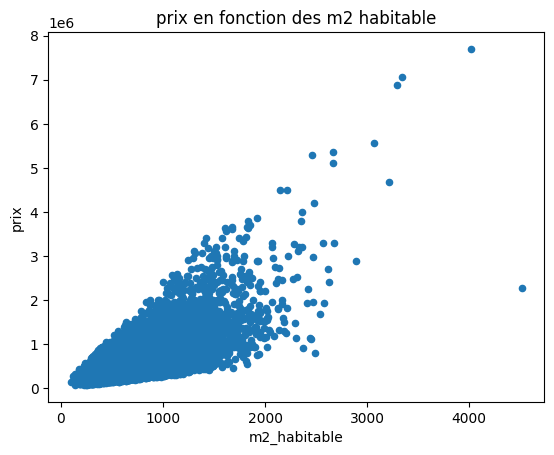

In [4]:
df_house_set.plot(kind="scatter", x= "m2_habitable", y="prix", title="prix en fonction des m2 habitable")

In [5]:
#Initiation d'un estimateur. Je prends les variables catégorièlles qui ont une correlation important avec le prix lors de mes 
# graphiques. C'est à dire, celles qui ont  dépassé le coéficcient de 0.5
from sklearn.model_selection import train_test_split
y = df_house_set['prix']
X = df_house_set[['salles_de_bain', 'm2_habitable', 'état', 'm2_above', 'm2_habitable15']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [6]:
X_train.shape

(17290, 5)

In [7]:
model = KNeighborsRegressor(n_neighbors=15)

print(model, type(model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [8]:
trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [9]:
trained_model.score(X_test,y_test)

0.5561938647844814

Il est nécessaire de connaître l'impact des autres variables (en dessous de 0.50).

In [10]:
y = df_house_set['prix']
X = df_house_set[['chambres', 'm2_Lot', 'étages', 'vue_sur_l-eau', 'vue', 'condition', 'm2_cave', 'yr_renovated','zipcode', 'lat', 'long', 'm2_lot15' ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [14]:
model = KNeighborsRegressor(n_neighbors=15)

print(model, type(model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [11]:
trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [12]:
trained_model.score(X_test,y_test)

0.17638594931665774

Je vais essayer de  récupérer ce 0,177 sur mon ancien score en testant toutes les variables ensemble

In [15]:
y = df_house_set['prix']
X = df_house_set[['salles_de_bain', 'm2_habitable', 'état', 'm2_above', 'm2_habitable15','chambres', 'm2_Lot', 'étages', 'vue_sur_l-eau', 'vue', 'condition', 'm2_cave', 'yr_renovated','zipcode', 'lat', 'long', 'm2_lot15' ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [16]:
model = KNeighborsRegressor(n_neighbors=15)

print(model, type(model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [17]:
trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [18]:
trained_model.score(X_test,y_test)

0.519494641437069

Le résultat n'est pas mieux, donc, je vais retester avec une combinaison des variables avec une correlation au dessus de 0.3 

In [19]:
y = df_house_set['prix']
X = df_house_set[['salles_de_bain', 'm2_habitable', 'état', 'm2_above', 'm2_habitable15','chambres', 'vue', 'm2_cave', 'lat']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [20]:
model= KNeighborsRegressor(n_neighbors=15)
trained_model= model.fit(X_train, y_train)
print(trained_model, type(trained_model))

KNeighborsRegressor(n_neighbors=15) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [21]:
trained_model.score(X_test, y_test)

0.5521670043144455

Le résultat n'est pas mieux que celui de variables au desuss de 0.5, mais étant donné que je mets en place un model  de voisinage, les variables positionnèlles pourront  apporter un meilleur score

In [26]:
y = df_house_set['prix']
X = df_house_set[['salles_de_bain', 'm2_habitable', 'état', 'm2_above', 'm2_habitable15', 'lat', 'long']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

model = KNeighborsRegressor(n_neighbors=15)

scores = cross_val_score(model, X_train_min_max, y_train, cv=5)

print(scores)
print(scores.mean())

[0.78212242 0.7816138  0.81525472 0.81567053 0.82502306]
0.8039369054411442


On effet notre  modèle améliore perform de plus 25%!

J'intègre les variables qui feront partie de mon formulaire de questions envers l'utilisateur

In [27]:
df_house_set.rename(columns={'étages': 'etages', 'état':'etat','vue_sur_l-eau':'vue_sur_leau'}, inplace=True)

In [26]:
df_house_set

,Unnamed: 0.1,Unnamed: 0,date,prix,chambres,salles_de_bain,m2_habitable,m2_Lot,etages,vue_sur_leau,...,condition,etat,m2_above,m2_cave,yr_renovated,zipcode,lat,long,m2_habitable15,m2_lot15
0,0,0,20141013T000000,221900.0,3,1.00,393.33,1883.33,1.0,0,...,3,7,393.33,0.00,1955,98178,47.51,-122.26,446.67,1883.33
1,1,1,20141209T000000,538000.0,3,2.25,856.67,2414.00,2.0,0,...,3,7,723.33,133.33,1991,98125,47.72,-122.32,563.33,2546.33
2,2,2,20150225T000000,180000.0,2,1.00,256.67,3333.33,1.0,0,...,3,6,256.67,0.00,1933,98028,47.74,-122.23,906.67,2687.33
3,3,3,20141209T000000,604000.0,4,3.00,653.33,1666.67,1.0,0,...,5,7,350.00,303.33,1965,98136,47.52,-122.39,453.33,1666.67
4,4,4,20150218T000000,510000.0,3,2.00,560.00,2693.33,1.0,0,...,3,8,560.00,0.00,1987,98074,47.62,-122.04,600.00,2501.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,21608,20140521T000000,360000.0,3,2.50,510.00,377.00,3.0,0,...,3,8,510.00,0.00,2009,98103,47.70,-122.35,510.00,503.00
21609,21609,21609,20150223T000000,400000.0,4,2.50,770.00,1937.67,2.0,0,...,3,8,770.00,0.00,2014,98146,47.51,-122.36,610.00,2400.00
21610,21610,21610,20140623T000000,402101.0,2,0.75,340.00,450.00,2.0,0,...,3,7,340.00,0.00,2009,98144,47.59,-122.30,340.00,669.00
21611,21611,21611,20150116T000000,400000.0,3,2.50,533.33,796.00,2.0,0,...,3,8,533.33,0.00,2004,98027,47.53,-122.07,470.00,429.00


In [29]:
y = df_house_set['prix']
X = df_house_set[['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'etages', 'vue_sur_leau', 'm2_cave', 'etat', 'm2_above', 'm2_habitable15', 'lat', 'long']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


X_train_min_max = minmax.fit_transform(X_train)

model = KNeighborsRegressor(n_neighbors=16)

scores = cross_val_score(model, X_train_min_max, y_train, cv=5)

print(scores)
print(scores.mean())

[0.79463136 0.79109107 0.83664229 0.84233666 0.84846475]
0.8226332259205194


J'intègre la notion  de factorisation du modèl avec pipeline, afin d'améliorer la performance.

In [31]:
y = df_house_set['prix']
X = df_house_set[['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'etages', 'vue_sur_leau', 'm2_cave', 'etat', 'm2_above', 'lat', 'long']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

minmax = MinMaxScaler()
model = KNeighborsRegressor(weights='distance', n_neighbors=16)

pipeline = Pipeline([
    ('minmax', minmax),
    ('knn', model)]
)

trained_pipe = pipeline.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

import pickle
pickle.dump(trained_pipe, open ('model.pkl', 'wb'))

In [116]:
param_grid = {'n_neighbors': np.arange(1, 50),
              'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

Étant donné qu'avec le procès factorisé j'ai obtenu un score de 0.7972614336399434, je préfère d'eteindre l'échantillonage de mon param_grid à 1% de la population.

In [117]:
grid.best_params_

{'n_neighbors': 16, 'weights': 'distance'}

Je vais tester  robustscaler et standarscaler pour essayer  de n'est pas influencer mon modèle avec les  valeurs extrêmes

In [34]:
y = df_house_set['prix']
X = df_house_set[['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'etages', 'vue_sur_leau', 'm2_cave', 'etat', 'm2_above', 'm2_habitable15', 'lat', 'long']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

robustScaler = RobustScaler()
model = KNeighborsRegressor(weights='distance', n_neighbors=16)

pipeline = Pipeline([
    ('robustscaler', robustScaler),
    ('knn', model)]
)

trained_pipe = pipeline.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

0.747764250260534

In [35]:
y = df_house_set['prix']
X = df_house_set[['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'etages', 'vue_sur_leau', 'm2_cave', 'etat', 'm2_above', 'm2_habitable15', 'lat', 'long']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

standard = StandardScaler()
model = KNeighborsRegressor(weights='distance', n_neighbors=16)

pipeline = Pipeline([
    ('standard', standard),
    ('knn', model)]
)

trained_pipe = pipeline.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

0.795889692360227

Je prends le score obtenu avec le transformateur minmax.

In [37]:
from sklearn.preprocessing import PolynomialFeatures

y = df_house_set['prix']
X = df_house_set[['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'etages', 'vue_sur_leau', 'm2_cave', 'etat', 'm2_above', 'zipcode']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


numeric_feature = ['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'm2_cave', 'm2_above']
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler()),
    ]
)

categorial_feature = ['etages','vue_sur_leau', 'etat', 'zipcode']
categorial_transformer=OneHotEncoder()


preprocessor = ColumnTransformer(
    remainder = "passthrough",
    transformers = [
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorial_transformer, categorial_feature)
    ]
)

model = Lasso(alpha=1, fit_intercept=False, positive=True)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)]
)

trained_pipe = pipeline.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

0.8233432553791764

In [44]:
from sklearn.linear_model import ElasticNet

y = df_house_set['prix']
X = df_house_set[['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'etages', 'vue_sur_leau', 'm2_cave', 'etat', 'm2_above', 'zipcode']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X, y = make_regression(numeric_feature=6, random_state=0)
regr = ElasticNet()
regr.fit(X_train, y_train)

numeric_feature = ['chambres', 'salles_de_bain', 'm2_habitable', 'm2_Lot', 'm2_cave', 'm2_above']
numeric_transformer = Pipeline([
    ('stdscaler', MinMaxScaler())]
)

categorial_feature = ['etages','vue_sur_leau', 'etat', 'zipcode']
categorial_transformer=OneHotEncoder()


preprocessor = ColumnTransformer(
    remainder = "passthrough",
    transformers = [
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorial_transformer, categorial_feature)
    ]
)

model = ElasticNet()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)]
)

trained_pipe = pipeline.fit(X_train, y_train)
trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

/Users/thefreshdirector/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.295e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


0.169893709173493